# Project1: 보스턴 주택 가격 예측 및 평가
> Summary : pandas, numpy 및 pyplot을 사용하여 data를 탐색하고, scikit-learn으로 예측하고, R_2, k-fold cross-validation, learning curves, complexity curve, GridSearchCV, RandomizedSerchCV 등을 사용하여 평가한다.

[Machine Learning Engineer Nanodegree](https://github.com/ritchieng/machine-learning-nanodegree.git) (machine-learning-nanodegree/model_evaluation_prediction/boston_housing)에 관련 자료가 있음

#### Model Evaluation & Validation

----

## 시작하기


이 프로젝트에서는 매사추세츠 주 보스턴 근교의 집에서 수집한 data에 대해 train 되고 test 된 model의 성능 및 예측력을 평가한다. 이 data에 대해 잘 fit된 model은 집에 대한 특정 예측, 특히 금전적 가치를 산출하는 데 사용될 수 있다. 이 model은 매일 이러한 정보를 사용해야 하는 부동산 중개인과 같은 사람에게는 매우 중요하다.


이 프로젝트의 dataset는 UCI Machine Learning Repository에서 시작했다. Boston housing data는 1978 년에 수집되었으며 506 개 항목 각각은 매사추세츠 보스턴의 여러 교외 지역 주택에 대한 집계된 data를 나타낸다. 이 프로젝트의 목적을 위해 다음과 같은 전처리 단계가 data set에 적용되었다.

> Data 이상치(Outlier)와 이를 전처리(Data Preparation)한 작업에 대한 설명

* 16 data 포인트의 'MEDV'값은 50.0이다. 이 data 포인트에는 빠진 값이나 검열 된 값이 포함되어있을 수 있으므로 제거되었다.

* 1 data 포인트의 'RM'값은 8.78이다. 이 data 포인트는 이상치로 간주되어 제거되었다.

* 'RM', 'LSTAT', 'PTRATIO'및 'MEDV'기능은 필수적이다. 나머지 비 관련 기능은 제외되었다.
* 'MEDV'기능은 35 년간의 시장 팽창을 고려하여 곱셈적으로 확장되었다.


이 프로젝트에 필요한 python library 몇 개와 함께 boston housing dataset을 load하려면 아래 code cell을 실행. dataset의 size가 보고되면 성공적으로 load된 dataset을 알 수 있다.

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('c:/Users/best0/Dropbox/machine-learning-nanodegree/model_evaluation_prediction/boston_housing/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print ('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


-----
## Data Exploration(data 탐색)

> 본래 boston housing dataset는 14개의 변수로 구성됨. 하지만 이 프로젝트에서는 4개의 변수만 사용함. 아래 링크 참조  
[source data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/?C=N;O=D)  
[explanation](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* crim - 도시별 1인당 범죄율  
* zn - 2만 5천 평방 피트를 넘는 지역에 주거지가 차지하는 비율.  
* indus - 마을당 비소매사업 에이커의 비율.  
* chas - 찰스 리버 더미 변수 (강이 경계에 있으면 1, 그렇지 않으면 0)  
* nox - 산화 질소 농도 (1000 만 분의 1)  
* rm - 주거당 평균 객실 수  
* age - 1940년 이전에 건설 된 소유주 거주 단위 비율  
* dis - 5개의 보스턴 고용 센터에 대한 가중 거리  
* rad - 방사형 고속도로 접근성 지수  
* tax - 만달러당 완전 가치 재산세 세율  
* ptration - town별 학생 - 교사 비율  
* black - 1000 (Bk - 0.63)^2 여기서 Bk는 town별 흑인 비율  
* lstate - 인구 감소 % 상태  
* medv - 1000달러짜리 주택 소유 주택의 중간값  

이 프로젝트의 첫 번째 section에서는 보스턴 주택 data에 대한 간단한 조사를 하고 관찰을 제공합니다. 탐색 프로세스를 통해 data에 익숙해지는 것이 결과를 더 잘 이해하고 정당화 할 수 있도록 돕는 기본 습관입니다.

이 프로젝트의 주요 목적은 주택 가치를 예측할 수 있는 작업 model을 구성하는 것이므로 data set를 **feature(독립변수)**와 **target variable(종속변수)**로 분리해야 합니다. **features**,  'RM'(방 개수), 'LSTAT'(인구감소비중), 'PTRATIO'(선생님당학생수)는 각 data 요소에 대한 양적 정보를 제공합니다. **target variable**,  'MEDV'은 우리가 예측하고자하는 변수가 될 것입니다. 이들은 features과 price에 각각 저장됩니다.


### Implementation : Calculate Statistics

최초의 코딩 구현을 위해 Boston 주택 가격에 대한 기술적 통계를 계산합니다. numpy는 이미 사용 가능하므로 이 라이브러리를 사용하여 필요한 계산을 수행하십시오.

아래의 코드 셀에서 다음을 구현해야합니다.

* 가격에 저장된 'MEDV'의 최소, 최대, 평균, 중간 및 표준 편차를 계산합니다.
    * 각 계산을 각각의 변수에 저장하십시오.

**Using Pandas(more efficient)**

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
First quartile of prices: $350,700.00
Second quartile of prices: $518,700.00
Interquartile (IQR) of prices: $168,000.00


### Question 1 - Feature Observation

다시 말하면 보스턴 주택 data set의 세 가지 feature인 'RM', 'LSTAT'및 'PTRATIO'를 사용하고 있다. 각 data 포인트 (neighborhood) :

* 'RM'은 이웃에있는 집들 사이의 평균 객실 수
* 'LSTAT'은 이웃에 거주하는 주택가가 "하급층"(working poor)으로 간주되는 비율
* 'PTRATIO'는 이웃에있는 초등 학교와 중등 학교 교사의 학생 비율

직감을 사용하여 위의 세 가지 feature 각각에 대해 해당 feature의 가치가 증가하면 'MEDV'가치가 **증가**하거나 'MEDV'가치가 **낮아**질 것이라고 생각합니까? 각각에 대한 답을 정당화하라  

**Hint** : 'RM'값이 6인 집이 'RM'값이 7인 집보다 많거나 적을 것으로 기대합니까?

**Answer**:

1. RM
    * RM이 높으면 MEDV가 높을 것으로 예상된다.
    * 더 많은 room이 더 많은 공간을 포함하기 때문에 더 많은 비용이 소요되고 다른 모든 요인은 일정해지기 때문이다.  
1. LSTAT
    * LSTAT가 높으면 MEDV가 낮을 것으로 예상된다.
    * "lower class"시민들이 지배하는 지역의 사회적 환경은 어린 아이들에게 도움이되지 않을 수도 있습니다. "upper class"시민이 지배하는 지역에 비해 상대적으로 안전하지 않을 수도 있다. 따라서 더 많은 "lower class"시민이 있는 지역은 수요를 낮추고, 따라서 가격을 낮출 것이다.
1. PTRATIO
    * 높은 PTRATIO의 경우 MEDV가 낮을 것으로 예상된다.
    * 이는 학생 대 교사 비율이 낮아 학생 개개인의 관심도가 낮아 학교에서의 성적을 저해할 수 있기 때문이다. 전형적으로 이것은 사립 학교에 비해 공립/주립 학교의 시나리오다. 공립학교 주변 주택 가격은 사립 학교 주변 주택 가격보다 일반적으로 낮다. 따라서 그러한 지역의 주택에 대한 수요가 더 적기 때문에 학생 대 교사 비율이 높을수록 저렴한 가격을 기대할 수 있다.

*개인 메모 : 이것은 직감에 근거한 것이다. 이 진술은이 프로젝트의 후속 부분에서 검증될 것이다.*

**Visualization**

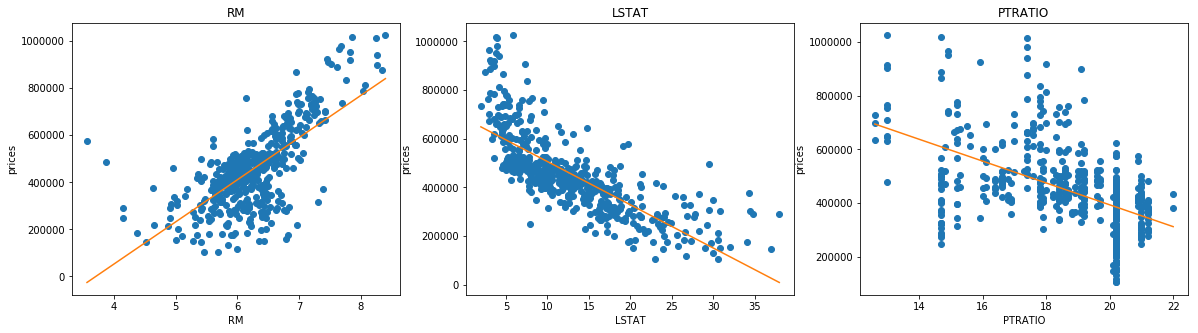

In [3]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

----
## Developing a Model

이 프로젝트의 두 번째 section에서는 model을 예측하는 데 필요한 도구와 기법을 개발한다. 이러한 도구 및 기술을 사용하여 각 model의 성능을 정확하게 평가할 수 있으므로 예측에 대한 확신이 크게 강화된다.

**Implementation : Define a Performance Metric(성과척도 정의)**

주어진 model의 품질을 측정하는 것은 training 및 testing에 대한 성능을 정량화하지 않고는 어렵다. 일반적으로 일부 유형의 성능 메트릭(performance metric)을 사용하여 오류 유형, 적합성(the goodness of fit) 또는 기타 유용한 측정을 계산한다. 이 프로젝트의 경우, 결정 계수 R2를 계산하여 model의 성과를 수치화한다. 모형에 대한 결정 계수는 회귀 분석에서 유용한 통계다. 종종 모형이 예측을 얼마나 잘하는지 설명하기 때문에 회귀 분석에 유용하다.

R2의 값 범위는 0에서 1까지이며, target variable의 예상 값과 실제 값 사이의 상관 관계 제곱을 포착한다. R2가 0인 model은 항상 target variable를 예측하지 못하고 R2가 1인 model은 target variable를 완벽하게 예측한다. 0과 1사이의 값은 이 model을 사용하여 target variable의 몇 퍼센트가 features로 설명될 수 있는지 나타낸다. model에는 음의 R2도 주어질 수 있습니다. 이는 model이 대상 변수의 평균을 순진하게 예측하는 model보다 우수함을 나타낸다.

아래 code cell의 performance_metric 함수의 경우 다음을 구현해야 한다.

* sklearn.metrics의 r2_score를 사용하여 y_true와 y_predict 사이의 성능 계산을 수행한다.
* 점수 변수에 성능 점수를 지정하라.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

### Question 2 - Goodness of fit(적합성)

data 집합에 5개의 data 요소가 있고 model에서 대상 변수에 대해 다음과 같은 예측을 했다고 가정한다.

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

아래 code cell을 실행하여 performance_metric 함수를 사용하고 이 model의 결정 계수를 계산

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Answer**:
* R^2 = 92.3%
* 이는 92.3 %의 변동이 목표 변수에 의해 설명되며 높은 것으로 보임을 의미한다.
* 잠재적인 함정 : 여기서 5 point밖에 없으며 통계적으로 유의미한 결론을 내리기가 어려울 수 있다.

### Implementation : Shuffle and Split Data(data 셔플 및 분할)

다음 구현에서는 보스턴 주택 data set를 가져 와서 data를 교육 및 테스트 하위 집합으로 나누는 것이 요구된다. 일반적으로 data는 무작위 순서로 섞여서 training subsets과 testing subsets을 만들어 data 집합의 순서에 따른 편차를 제거한다.

아래의 code cell에서 다음을 구현해야 한다.  

* sklearn.cross_validation의 train_test_split을 사용하여 feature 및 price data를 training과 testing sets로 shuffle하고 split한다.  
    * data를 80% training, 20% testing으로 나눈다.
    * train_test_split의 random_state를 원하는 값으로 설정한다. 결과가 일관성있게 유지된다.
* train과 testing split을 X_train, X_test, y_train 및 y_test에 할당한다.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


#### Extra check

In [7]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

489
0.7995910020449898
0.20040899795501022


### Question 3 - Traing and Test


*learning algorithm에 대해 dataset을 일정 비율로 training 및 testing subsets으로 분할하면 어떤 이점이 있습니까?*  
**Hint** : model을 테스트 할 방법이 없다면 무엇이 잘못될 수 있습니까?

**Answer** :

* 동기 부여 : 우리는 기계 학습 model 중에서 선택할 방법이 필요하다.
    * 그리고 우리의 목표는 샘플 밖의 data에서 model의 가능성 있는 성능을 추정하는 것이다.
* 초기 아이디어 : 우리는 동일한 data를 train하고 test 할 수 있다.
    * 그러나 training 정확도를 극대화하면 training data에 과도하게 적용되는 지나치게 복잡한 model에 대한 보상이 제공된다.
    * 더 많은 feature를 추가하면 천천히 100%의 정확도에 도달할 수 있지만 일반화를 제대로 수행 할 수는 없다.(overfit)
* 대안 아이디어 : train/test split을 사용할 수 있다.
    * 우리는 그 model을 다른 data로 train하고 test 할 수 있도록 하기 위해 dataset을 두 부분으로 나눌 수 있다. 
    * 그런 다음 testing 정확도는 샘플 외부 성능의 training 정확도보다 더 좋게 추정한다.

**이것은 train/test split 질문의 범위를 벗어나는 확장으로, k-fold cross-validation 없이 train/test split을 단순히 사용하는 높은 분산 문제를 강조한다.**

* 그러나 train/test split에 큰 문제가 있다.
    * testing set에 뽑힌 관측치가 변경되면 testing 정확도가 크게 바뀔 수 있기 때문에 높은 분산 추정치를 제공된다.
    * testing 정확도는 testing set에 어떤 관측치가 뽑혔는지에 따라 크게 달라질 수 있다.
    * 따라서 이 문제를 해결하기 위해 k-fold cross-validation를 사용해야 한다.

-----

## Analyzing Model Performance(model 성능 분석)


세 번째 section에서는 여러 가지 model의 learning 및 testing performances를 다양한 training data subsets에서 살펴 본다. 또한 전체 training set에서 'max_depth' parameter가 증가하는 특정 알고리즘을 조사하여 model 복잡성이 성능에 미치는 영향을 관찰한다. 결과만으로는 명확하게 나타나지 않는 형태를 시각화하는 것과 같이 다양한 기준에 따라 model의 성과를 그래프로 표시하는 것은 분석 프로세스에 도움이 된다.


### Learning Curves

다음 code cell은 최대 depth가 다른 decision tree model에 대해 4개의 그래프를 생성한다. 각 그래프는 training set의 크기가 증가함에 따라 training과 testing 모두에 대한 model의 learning curve를 시각화한다. learning curve의 음영 부분은 해당 곡선의 불확도(uncertainty)를 나타낸다.(표준편차로 측정) model은 결정계수인 R2를 사용하여 training 및 testing sets에서 채점된다.

In [21]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print ("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print ("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

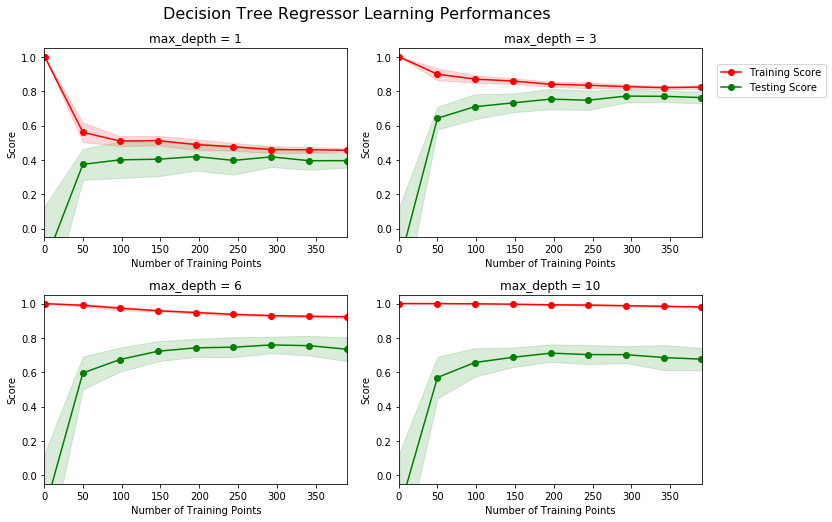

In [22]:
ModelLearning(features, prices)

### Question 4 - Learning the Data

*위의 그래프 중 하나를 선택하고 model의 최대 깊이를 명시하십시오. 트레이닝 포인트가 추가되면 트레이닝 커브의 점수는 어떻게됩니까? 테스트 곡선은 어떻습니까? 더 많은 교육 포인트가 model에 도움이 될까요?*
힌트 : 학습 곡선이 특정 점수에 수렴하고 있습니까?

**Answer** :  

* max_depth = 1 (높은 bias 시나리오)

    1. 관찰 점수에 따라 testing score(녹색 선)가 어떻게 증가하는지 볼 수 있다.
        * 그러나 testing score는 약 0.4점으로 증가하며, 낮은 점수다.
        * 이는 이 model이 새롭고, 보이지 않는 data에 대해 일반화가 잘 되지 않은 방법이라는 것을 의미한다.
    1. 또한, training score(빨간색 선)는 관측 횟수에 따라 감소한다.
        * 또한, trainning score는  약 0.4의 매우 낮은 점수로 감소한다.
        * 이는 이 model이 data에 적절하게 fit 되지 않은 것으로 짐작된다.
    1. 따라서 이 model은 높은 bias 문제에 직면하고 있다고 말할 수 있다. 결과적으로, model이 dataset에 underfitting되었기 때문에 더 많은 training point를 갖는 것이 model에 도움이 되지 않는다. 대신, dataset에 더 적합하도록 model 복잡성을 증가시켜야 한다. 
        * 게다가, tesing score는 극대점에 도달하여 model에 더 많은 training point를 추가해도 향상되지 않을 수 있음을 나타낸다.  
        
** 이것은 완전성을 위해 나머지 depth들에 대해 확장해 설명한 것이다. 완전한 문장으로 쓰는 대신 모든 것을 요약했다.**

* max_depth = 3 (이상적인 시나리오)
    1. testing score (녹색 선)는 training point와 함께 증가한다.
        * ~0.8에 도달
        * 높은 점수
        * 적절한 일반화
    1. training score (빨간색 선)가 training point에 따라 약간 감소한다.
        * ~0.8에 도달
        * 높은 점수
        * dataset에 잘 fit됨
    1. 높은 bias 또는 높은 variance 문제가 없는 것 같다.
        * Model은 적합하고 잘 일반화 되었다.
        * 이상적임
        * 더 많은 training point가 더 이상적인 model이 되어야 한다!
* max_depth = 10 (high variance 시나리오)
    1. testing score(녹색 선)는 training point와 함께 증가한다.
        * ~ 0.7에 도달
        * 별로 좋지 않은 점수
        * 잘 일반화하지 않는다.
    1. training score(빨간 선)는 training point로 간신히 감소한다.
        * ~ 1.0
        * 거의 완벽한 점수
        * 적합하지 않은 data set
    1. 높은 분산 문제가있는 것 같다.
        * 과최적화
* max_depth = 6 (Slightly High Variance 시나리오)
    1. testing score(녹색 선)는 training point와 함께 증가한다.
        * ~ 0.75에 도달
        * 별로 좋지 않은 점수
        * 잘 일반화하지 않는다.
    1. (빨간색 선)가 훈련 점에 따라 약간 감소한다.
        * ~ 0.9까지
        * 높은 점수
        * 과최적화된 dataset
    1. 높은 분산 문제가 있는 것 같다.
        * 과최적화
        * 더 많은 training point가 도움이 될 수 있다.
        * 이상적인 시나리오에 가까워지고 있다!


### Complexity Curves


다음 code cell은 서로 다른 maximum depths를 사용하여 training data에서 훈련(trained)되고 유효성이 검증된(validated) 의사 결정 트리 model에 대한 그래프를 생성한다. 그래프는 두 가지 복잡성 곡선을 생성한다. 하나는 training용이고 다른 하나는 유효성 검사(validation)용이다. **Learing Curves**과 유사하게 두 복잡도 곡선의 음영 영역은 해당 곡선의 불확실성을 나타내며 model은 performance_metric 함수를 사용하여 training 및 validation 모두에서 점수가 매겨진다.

아래의 code cell을 실행하고 이 그래프를 사용하여 다음 두 가지 질문에 답하라.

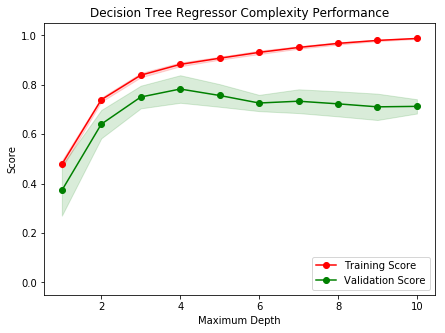

In [23]:
ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff

* model을 maximum depth 1로 train 할 때, model에 높은 bias 또는 높은 variance가 발생합니까?  model의 maximum depth가 10인 경우 어떤가? graph의 시각적 단서는 결론을 정당화합니까?*

**Hint :** model이 높은 bias 또는 높은 variance를 겪고 있는지 어떻게 알 수 있습니까?

**Answer :  
model이 높은 bias 또는 높은 variance을 겪고 있을 때 identifying**

* model이 높은 bias 또는 높은 variance을 겪고 있는지 여부를 쉽게 식별할 수 있다.
    * 높은 variance model은 training score와 validation score 사이에 차이가 있다.
        * model을 잘 fit할 수는 있지만 잘 일반화 할 수 없기 때문에 높은 training score는되지만 validation score는 낮기 때문이다.
    * 높은 bias model은 training score와 validation score 사이의 차이가 거의 없거나 전혀 없습니다.
        * model을 잘 fit하지 못하고 잘 일반화 할 수 없기 때문에 두 점수가 비슷하게 낮은 점수로 수렴되기 때문이다.

**1. 최대 깊이 1 : high bias**
* training score와 testing score는 모두 낮다.
* training score와 testing score 사이에는 간극이 거의 없다.
* 이는 model이 dataset를 잘 fitting하지 못했음을 나타내며 일반화가 잘되지 않아 model이 높은 bias를 겪고 있음을 나타낸다.

**2. 최대 깊이 10 : high variance**

* training score가 높다. testing score가 낮음
* training score와 testing score 사이에는 상당한 차이가 있다.
* 이는 model이 dataset를 잘 fitting되었지만 잘 일반화되지 않았음을 나타내므로 model은 높은 variance을 겪고 있다.  



### Question 6 - Best-Guess Optimal Model
*보이지 않는 data를 가장 잘 대표하는 model의 maximum depth는 어느 정도라고 생각하십니까? 어떤 직감이 이 대답을 이끄는가?*

**Answer** :

* maximum depth는 4다.
* training score는 여기가 최고치(plateau)인 것으로 보이는데, 보이지 않는 data로 일반화하는 model의 가능한 최고 점수를 나타낸다.
* training score와 test score 사이의 차이는 너무 심하지 않아서 model이 높은 variance scenario를 겪지 않을 수도 있음을 나타낸다.

-----

## Evaluating Model Performance

프로젝트의 마지막 section에서는 fit_model의 최적화 된 model을 사용하여 model을 구성하고 client의 feature set를 예측한다.

### Question 7 - Grid Search

*grid search technique은 무엇이며 어떻게 learning algorithm을 최적화하기 위해 적용될 수 있는가?*  

**Answer** :  

* 본질적으로, grid search technique은 k-fold cross-validation을 사용하여 검색될 parameter들의 grid를 정의할 수 있게 한다.
* 중요한 것은 grid search technique이 최상의 model을 찾기 위해 제공되는 hyper-parameter 값의 모든 조합을 철저히 시도한다는 것이다.
* 그런 다음 learning algorithm을 최적화하는 해당 parameters와 일치하는 cross-validation(교차 유효성 검사) 정확도가 가장 높다.

#### 전문가의 팁 : RandomizedSearchCV

* 우리는 GridSearchCV를 사용할 것이지만 더 큰 dataset의 경우 계산적 비용이 많이 들 수 있다.
* RandomizedSearchCV와 같이 시간을 절약하기 위해 hyperparameter 최적화에 사용될 수있는 다른 기술이 있다. 이 경우 전체 parameter 공간을 탐색하는 대신 지정된 distribution(분포)에서 parameter 중 setting된 고정된 수만큼만 샘플링한다.
* 이는 시간을 절약해야 할 때 유용하지만 dataset가 비교적 적은 우리의 경우에는 필요하지 않다.

*아래에서 GridSearch CV 및 RandomizedSearchCV를 시연한다.*

### Question 8 - Cross-Validation

*k-fold 교차 검증 교육 기술은 무엇입니까? 이 기술은 model을 최적화 할 때 grid search에 어떤 이점을 제공합니까?*  
**Hint** : test set가 있는 이유와 매우 흡사하게 cross-validated set가 없는 grid search을 사용하면 무엇이 잘못될 수 있는가?

**Answer** :  

* K-fold cross-validation 요약 :
    * dataset는 동일한 크기의 K "folds"로 분할된다.
    * 각 fold는 testing set으로 1번 작동하고, training set K-1 번으로 작동한다.
    * average testing 성능은 샘플 밖의 성능(out-of-sample perfomance)의 추정치로 사용된다.
    * cross-validated performance라고도 한다.
* K-fold cross-validation의 이점 :
    * train/test split보다 샘플 밖의 성능에 대한 보다 신뢰할만한 추정.
    * train/test split의 단일 평가판(single trial)의 variance을 줄인다.
* 따라서 k-fold cross-validation의 이점을 통해 평균 learning algorithm에 대한 가장 최적화된 parameters의 set을 결정하기 위한 benchmark로서 average testing 정확도를 사용할 수 있다.
    * cross-validation set을 사용하지 않고 grid search를 실행하면, cross-validation set가 없기 때문에 최적의 parameters sets가 달라지게 되고, out-of-sample performance의 추정치가 높은 variance를 가진다
    * 요약하면, k-fold cross-validation이 없으면 grid search가 특정 train-test split에서는 성능이 매우 좋지만 그 밖의 경우에는 poorly한 hyper-parameter value combinations을 선택할 위험이 더 높다.

#### k- fold cross-validation의 제한 :

* data가 균일하게(uniformly) 분포되지 않은 경우(예 : sorted data) 제대로 작동하지 않는다.

### Implementation : Fitting a model

최종 implementation에서는 **decision tree algorithm**을 사용하여 모든 것을 함께 가져 와서 model을 train해야한다. optimized model을 생성하기 위해 grid search technique을 사용하여 model을 train하여 decision tree algorithm의 'max_depth' parameter를 최적화한다. 'max_depth' parameter는 decision tree algorithm이 예측을 하기 전에 data에 대해 물어볼 수 있는 질문의 수로 생각할 수 있다. decision tree는 *supervised learning algorithms*이라고 하는 algorithms class의 일부다.

아래 code cell의 fit_model fuction의 경우 다음을 구현해야 한다.

* decision tree regressor object(회귀 객체)를 생성하려면 sklearn.tree의 DecisionTreeRegressor를 사용.
    * 이 객체를 'regressor'변수에 할당.
* 1에서 10 사이의 값으로 'max_depth'에 대한 dictionary를 만들고 이를 'params'변수에 할당.
* sklearn.metrics의 make_scorer을 사용하여 scoring function object(채점 함수 객체)를 만든다.
    * performance_metric fuction을 parameter로 그 object에 전달(pass).
    * 이 scoring function을 'scoring_fnc'변수에 할당.
* sklearn.grid_search의 GridSearchCV를 사용하여 grid search object를 만든다.
    * parameter로 'regressor', 'params', 'scoring_fnc'및 'cv_sets'변수를 object에 전달.
    * GridSearchCV object를 'grid'변수에 할당.
    
#### Using GridSearchCV

In [25]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

#### Using RandomizedSearchCV
*필자는 함수의 이름을 특별히 변경하여 original question과 충돌하지 않도록 했다.*

In [26]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

### Making Predictions

model이 주어진 dataset에 대해 train을 받으면 이제는 새로운 input dataset에 대한 예측을 수행하는 데 사용할 수 있다. *decision tree regressor*의 경우 model은 *input data에 대해 물어 보는 가장 좋은 질문*을 배웠고 **target variable**에 대한 예측으로 응답 할 수 있다. 이 예측을 사용하여 model이 train되지 않은 data와 같이 target variable의 값을 알 수 없는 data에 대한 정보를 얻을 수 있다.

### Question9 - Optimal Model

*최적의 model이 갖는 Maximum depth는 얼마인가? 이 결과는 **Question 6**에서의 추측과 어떻게 비교되는가? *

아래의 code block을 실행하여 decision tree regressor를 training data에 맞추고(fit) 최적의 model을 생성.

In [27]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [28]:
# Explanation of how we got the 'max_depth' param
# First we fit the model
# Then we use get_params() to get the optimal parameters
# As you can see here, it's a dictionary
reg = fit_model(X_train, y_train)
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [29]:
# We can access our value from reg.get_params(), a dictionary, using dict['key']
reg.get_params()['max_depth']

4

**Answer** :
* 최적화 model은 4의 maximum depth를 갖는다.
* max depth는 question 6에서의 추측과 같다.

**Extra findings using RandomizedSearchCV**

In [30]:
# Fit the training data to the model using grid search
reg_2 = fit_model_2(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg_2.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Question 10 - Predicting Selling Prices

보스톤 지역의 부동산 중개인이 주택을 소유한 고객이 팔기를 희망할 때 이 model을 사용하여 가격을 책정하려 한다고 상상해보자. 세 명의 고객으로부터 다음 정보를 수집했다.

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

*각 고객의 주택을 어떤 가격으로 판매 할 것을 추천할 것인가? 이 가격이 각각의 features의 가치를 고려할 때 합리적인가?*  
**Hint** : Data Exploration section에서 계산한 통계치를 사용하여 응답을 정당화하라.

아래의 code block을 실행하여 optimized model이 고객의 주택 각각에 대한 예측을 하라.

In [31]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


**Answer** :  

**Prices to recommend**

* 고객1 : 406,900
* 고객2 : 232,200
* 고객3 : 938,100

**Data Exploration Findings**

* 최소 가격 : 105,000.00
* 최대 가격 : 1,024,800.00
* 평균 가격 : 454,342.94
* 중간 가격 : 438,900.00
* 가격 표준편차 : 165,340.28

**Reasonableness**

* dataset의 가격이 모두 가장 가까운 백으로 반올림됨에 따라 가격은 가장 가까운 백으로 반올림된다.
* Data Exploration과 비교할 때, 고객1과 고객2의 주택 가격은 평균가격과 중간가격보다 낮은 것으로 보인다.
    * 고객2의 경우 poverty level이 높고 student-to-teacher ratio가 높아서 합리적인 것처럼 보인다.
    * 고객1의 경우 poverty level과 student-to-teacher ratio이 평균으로 합리적인 것처럼 보인다.
* 고객3의 주택가격은 평균 및 중간가격보다 높으며 dataset의 최대 가격에 가깝다.
    * 이는 poverty level이 낮고 student-to-teacher ratio가 높고 많은 수의 방이 있는 경우 타당하다.
    
**Visualization**

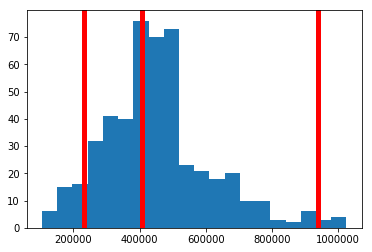

In [32]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

**전문가 팁 : NearestNeighbors를 사용하여 예측의 합리성 평가**

* 예측값이 합리적인지를 평가하기 위해 중앙값과 평균값을 비교하고 하나의 표준 편차 범위에 포함되어 있는지 확인하기 위해 SKlearn을 사용하여 feature vector의 가장 가까운 이웃을 찾을 수 있다.
* 그런 다음 결과를 비슷한 특성을 가진 가장 가까운 이웃과 대조할 수 있다.

In [33]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Set number of neighbors
num_neighbors=5

def nearest_neighbor_price(x):
    # x is your vector and X is the data set.
    def find_nearest_neighbor_indexes(x, X):
        # Instantiate
        neigh = NearestNeighbors(num_neighbors)
        # Fit
        neigh.fit(X)
        distance, indexes = neigh.kneighbors(x)
        return indexes
        # This returns, the position, say for example [4, 55, 22]
        # array([[357, 397, 356, 141, 395]])
    indexes = find_nearest_neighbor_indexes(x, features)
    # Create list
    sum_prices = []
    # Loop through the array
    for i in indexes:
        # Append the prices to the list using the index position i
        sum_prices.append(prices[i])
    # Average prices
    neighbor_avg = np.mean(sum_prices)
    # Return average
    return neighbor_avg

# Test if it's working with a list [4, 55, 22]
arr_test = np.array([4, 55, 22]).reshape(1, -1)
print (nearest_neighbor_price(arr_test))

# client_data = [[5, 17, 15], # Client 1
               #[4, 32, 22], # Client 2
               #[8, 3, 12]]  # Client 3

# Loop through data, this is basically doing the following
# print(nearest_neighbor_price([5, 17, 15]))
# print(nearest_neighbor_price([4, 32, 22]))
# print(nearest_neighbor_price([8, 3, 12]]))
index = 0
for i in client_data:
    arr = np.array(i).reshape(1, -1)
    val=nearest_neighbor_price(arr)
    index += 1
    # num_neighbours is constant at 5
    # index changes from 1 to 2 to 3
    # value changes respectively from $372,540.00 to $162,120.00 to $897,120.00
    print ("The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val))

280980.0
The predicted 5 nearest neighbors price for home 1 is: $372,540.00
The predicted 5 nearest neighbors price for home 2 is: $162,120.00
The predicted 5 nearest neighbors price for home 3 is: $897,120.00


### Sensitivity  

최적의(optimal) model은 반드시 강건한(robust) model은 아니다. 때로는 model이 너무 복잡하거나 너무 단순하여 새로운 data로 충분히 일반화 할 수 없다. 때때로 model은 주어진 data의 구조에 적합하지 않은 learning algorithm을 사용할 수 있다. 다른 경우, data 자체가 너무 잡음이 많거나(too noisy) model이 target variable를 적절하게 포착할 수 있도록 너무 적은 샘플만 포함할 수 있다. 즉, model이 적합하지 않을 수 있다.(is underfitted) 아래의 code cell을 실행하여 다른 training 및 testing set로 fit_model function를 10번 실행하면 특정 client에 대한 예측이 trained된 data로 어떻게 변하는지 확인할 수 있다.

In [34]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability

*구성된 model이 실제 환경에서 사용되어야 하는지 또는 사용되어서는 안되는지 논의하십시오.*

**Hint** : 응답 할 몇 가지 질문 :

* *1978년에 수집된 data가 오늘날의 data와 어떻게 관련이 있는가?*
* *data에 있는 feature가 주택을 설명하기에 충분한가?*
* *일관성있는 예측을 할 수있을 정도로 강건한(robust) model인가?*
* *보스턴과 같은 urban city에서 수집한 data는 rural city에 적용될 수 있나?*


**Answer** :

* rural city에서 수집한 data는 인구 통계가 변경될 때 적용되지 않을 수 있으며 다른 features는 urban data를 사용하여 학습한 features가 있는 model 대신 dataset에 더 잘 맞을 수 있다.
* learning algorithm은 매우 오래된 dataset으로부터 학습했다. 1978년 이후 인구 통계가 많이 바뀌었기 때문에 관련성이 없을 수 있다.
* 현재 3개의 features만 있다. 범죄율, nearby to city, 대중 교통 접근성 등 더 많은 feature가 포함될 수 있다.